In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<img src="https://drberg-dam.imgix.net/others/blog-how-to-read-and-understand-cholesterol-numbers-1.jpg" width="800">

## Age
> Male =>1
> Female =>0

In [2]:
# Importing the dataset
dataset = pd.read_csv('cholesterol.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,0,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,3,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,3,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,2,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,1,130,0,2,172,0,1.4,1,0,3,0,204


In [4]:
x = dataset.drop(['chol'],axis=1).values
y = dataset['chol'].values

In [5]:
print(x)

[[63.  1.  0. ...  0.  6.  0.]
 [67.  1.  3. ...  3.  3.  2.]
 [67.  1.  3. ...  2.  7.  1.]
 ...
 [68.  1.  3. ...  2.  7.  2.]
 [57.  1.  3. ...  1.  7.  3.]
 [57.  0.  1. ...  1.  3.  1.]]


In [6]:
print(y)

[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 229 239
 275 266 211 283 284 224 206 219 340 226 247 167 239 230 335 234 233 226
 177 276 353 243 225 199 302 212 330 230 175 243 417 197 198 177 290 219
 253 266 233 172 273 213 305 177 216 304 188 282 185 232 326 231 269 254
 267 248 197 360 258 308 245 270 208 264 321 274 325 235 257 234 256 302
 164 231 141 252 255 239 258 201 222 260 182 303 265 188 309 177 229 260
 219 307 249 186 341 263 203 211 183 330 254 256 407 222 217 282 234 288
 239 220 209 258 227 204 261 213 250 174 281 198 245 221 288 205 309 240
 243 289 250 308 318 298 265 564 289 246 322 299 300 293 277 197 304 214
 248 255 207 288 282 160 269 226 249 394 212 274 233 184 315 246 274 409
 244 270 305 195 240 246 283 254 196 298 294 211 299 234 236 244 273 254
 325 126 313 211 309 259 200 262 244 215 231 214 228 230 193 204 243 303
 271 268 267 199 282 269 210 204 277 206 212 196 327 149 269 201 286 283
 249 271 295 235 306 269 234 178 237 234 275 212 20

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x, y,test_size=0.33, random_state=0)

In [8]:
# Convert x_train to a DataFrame
x_train_df = pd.DataFrame(x_train, columns=dataset.drop(['chol'], axis=1).columns)

# Calculate the correlation matrix
correlation_matrix = x_train_df.corr()

# Print the correlation matrix
print(correlation_matrix)

               age       sex        cp  trestbps       fbs   restecg   
age       1.000000 -0.193137  0.074129  0.224824  0.167594  0.066363  \
sex      -0.193137  1.000000  0.065930 -0.077341  0.060726  0.025761   
cp        0.074129  0.065930  1.000000 -0.080460 -0.075229  0.001648   
trestbps  0.224824 -0.077341 -0.080460  1.000000  0.174726  0.176771   
fbs       0.167594  0.060726 -0.075229  0.174726  1.000000  0.097858   
restecg   0.066363  0.025761  0.001648  0.176771  0.097858  1.000000   
thalach  -0.412083  0.015842 -0.361363 -0.043509  0.001810 -0.038497   
exang     0.057195  0.151542  0.445047  0.020178 -0.028444  0.060796   
oldpeak   0.134978  0.076132  0.230935  0.138092  0.050502  0.115982   
slope     0.082334  0.038890  0.148177  0.092674  0.060675  0.076875   
ca        0.391442  0.055549  0.220758  0.078281  0.174167  0.092145   
thal      0.099365  0.373711  0.283885  0.101150  0.032673 -0.013824   
num       0.213587  0.173772  0.447744  0.230612  0.079064  0.21

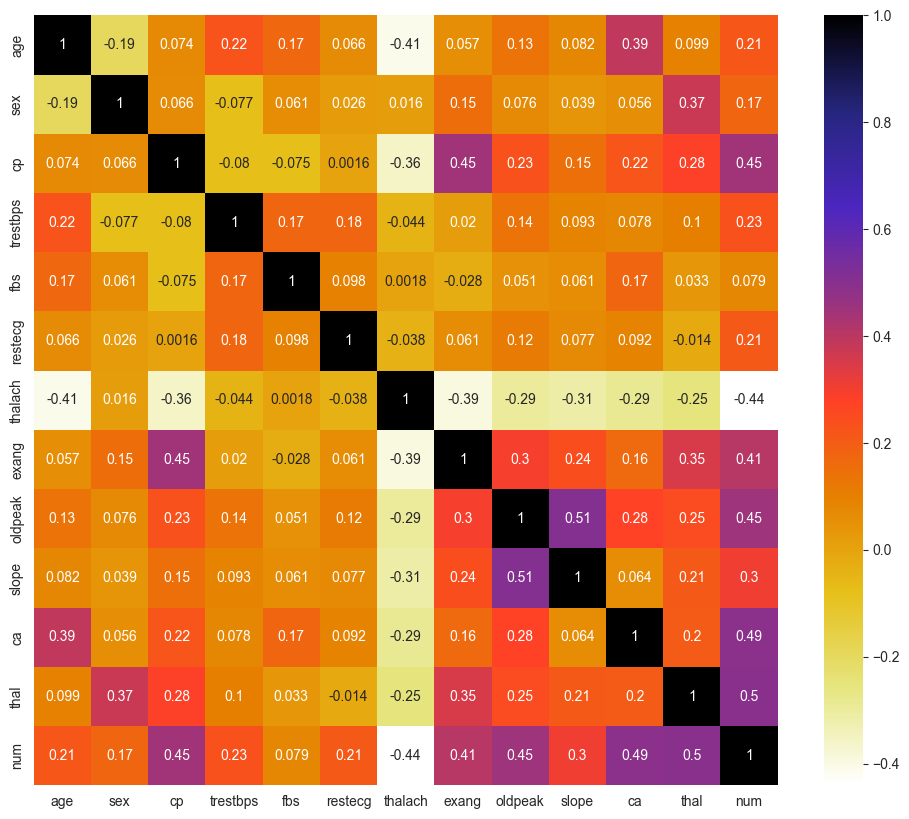

In [9]:
import seaborn as sns
#Using Pearson Correlation
plt. figure (figsize=(12,10))
cor =x_train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm. CMRmap_r)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation (dataset, threshold):
    col_corr =set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation (x_train_df, 0.5)
len (set (corr_features))

1

In [12]:
corr_features

{'slope'}

In [13]:
from sklearn. linear_model import LinearRegression
ml=LinearRegression()
ml. fit (x_train, y_train)

LinearRegression()

## This Provides Cholesterol Range

In [14]:
y_pred=ml. predict (x_test)
print (y_pred)

[249.68900195 237.0163861  245.15529293 254.61890953 243.6357919
 240.00475613 254.1777093  273.32828232 280.86711411 251.82990137
 267.38927718 251.45882348 272.18566962 250.58683908 255.011842
 273.30579521 271.77376164 264.03606877 238.76878653 250.74302154
 230.56488034 246.85359542 216.7029297  244.28350816 248.06248101
 234.0234614  269.82420602 241.300904   217.58830234 248.48354248
 261.76403435 221.04733719 268.58140042 280.93563232 239.04882202
 287.2195534  244.31533736 241.84471645 256.36732549 232.62104501
 258.95521338 256.71588806 252.9163727  269.406464   261.4930398
 269.20783359 245.42264319 220.9852895  254.43089499 269.3848503
 251.7225216  268.2158406  271.34539506 257.97726234 264.71209615
 236.96517831 259.95688215 235.07054393 251.37481854 225.30605395
 289.81085372 254.41421902 218.17375439 222.5935517  257.24319113
 260.46717537 221.44858832 245.94394929 218.39972044 246.13729227
 261.23703333 264.25678329 238.30088987 245.23779353 242.09847393
 220.70771466 3

In [15]:
ml.predict ( [[57,1,4,140,0,0,148,0,0.4,2,0,6,0]])

array([231.01036658])

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.01119424700388505

Text(0.5, 1.0, 'Actual vs. Predicted')

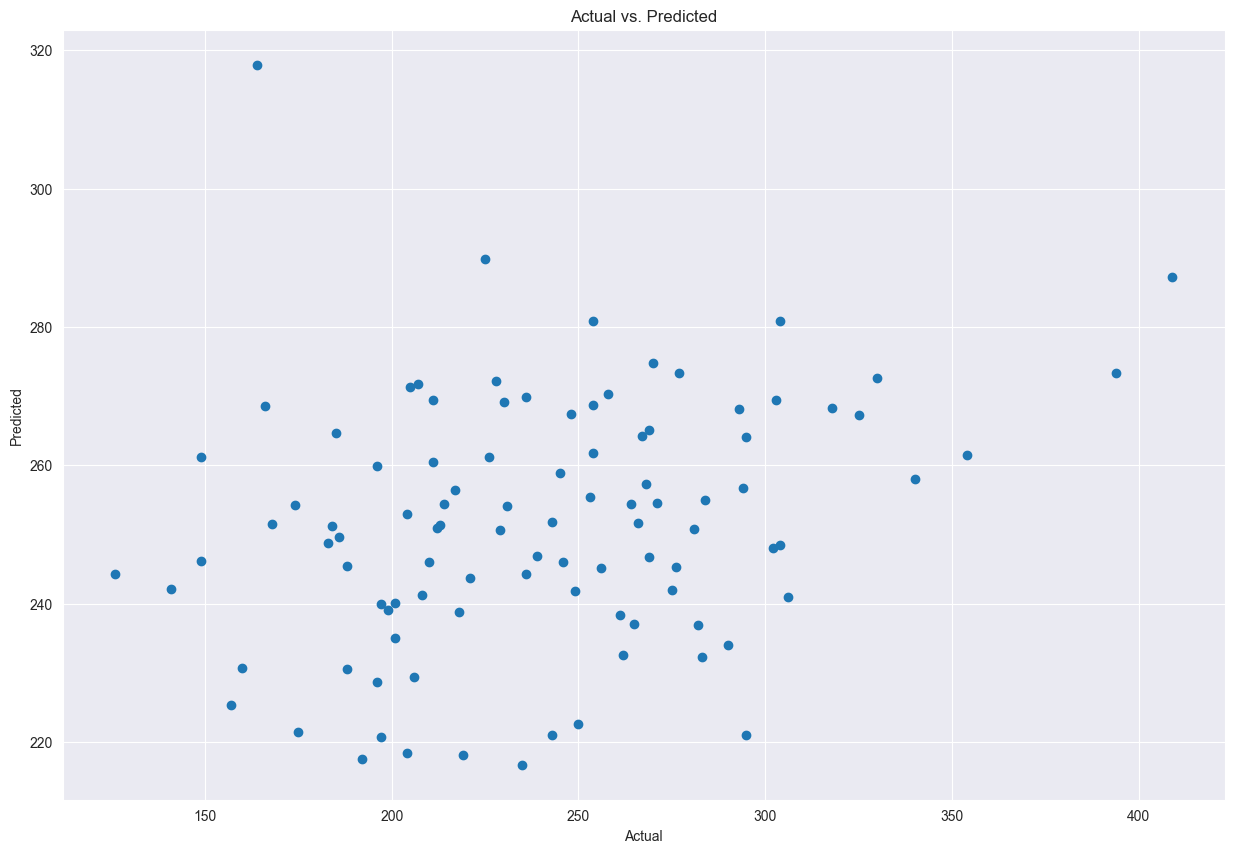

In [17]:
import matplotlib.pyplot as plt
plt. figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [18]:
pred_y_df=pd. DataFrame({'Actual Value' :y_test, 'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_y_df [0:20]

,Actual Value,Predicted value,Difference
0,186,249.689002,-63.689002
1,265,237.016386,27.983614
2,256,245.155293,10.844707
3,271,254.618910,16.381090
4,221,243.635792,-22.635792
5,197,240.004756,-43.004756
6,231,254.177709,-23.177709
7,394,273.328282,120.671718
8,254,280.867114,-26.867114
9,243,251.829901,-8.829901


In [20]:
import joblib
from sklearn.metrics import r2_score

# Save the model to a .hy file
joblib.dump(ml, 'cholesterol_model.hy')

# Load the model from the .hy file
loaded_model = joblib.load('cholesterol_model.hy')

# Assuming x_test is your test data
predictions = loaded_model.predict(x_test)

# Calculate R-squared score for regression models
r2_score = r2_score(y_test, predictions)
print(f"R-squared score of the loaded model is {r2_score}")

R-squared score of the loaded model is 0.01119424700388505
